# Assignment - Knock Aiport Weather Data

### Authored by: Stephen Kerr

This assignment is broken down into 2 sections to Plot the data: 

#### Part 1 - Temperature Plots
- The temperature
- The mean temperature each day
- The mean temperature for each month

#### Part 2 - Windspeed
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)


This Notebook will be divided into 2 Parts to address each assessment part separately. But first we will do imports, load the data, explore and clean the data to be ready for analysis.  

The Weather data analysis was gathered from the Irish Storm Centre from **Knock Airport Weather Station**.  
See their website [here](https://cli.fusio.net/cli/stormcenter/index.html).  

## Environment Setup

In [1]:
# Imports 

import pandas as pd 

import matplotlib.pyplot as plt

# used to handle date formatting on plots see https://matplotlib.org/stable/api/dates_api.html 
import matplotlib.dates as mdates 

import os

## Load the data

In [2]:
# Load the data
# first 23 rows are metadata

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
raw_weather_data = pd.read_csv(url, skiprows=23, index_col=False, low_memory=False)

# raw data dir path
raw_data_dir = "./data/raw/"

# processed data dir path
processed_data_dir = "./data/processed/"

# output/figures dir path
figures_dir = "./output/figures/"

os.makedirs(raw_data_dir, exist_ok=True)
os.makedirs(processed_data_dir, exist_ok=True)
os.makedirs(figures_dir, exist_ok=True)

raw_weather_data.to_csv(raw_data_dir+"raw-weather-data.csv")

## Cleaning the data for analysis

In [3]:
headers = raw_weather_data.columns.tolist()
headers

['date',
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

## Dataset Columns 

This information was sourced from the original files metadata.

date:  -  Date and Time (utc)  
rain:  -  Precipitation Amount (mm)  
temp:  -  Air Temperature (C)  
wetb:  -  Wet Bulb Temperature (C)  
dewpt: -  Dew Point Temperature (C)              
rhum:  -  Relative Humidity (%)  
vappr: -  Vapour Pressure (hPa)  
msl:   -  Mean Sea Level Pressure (hPa)  
wdsp:  -  Mean Wind Speed (knot)  
wddir: -  Predominant Wind Direction (degree)  
ww:    -  Synop code for Present Weather  
w:     -  Synop code for Past Weather  
sun:   -  Sunshine duration (hours)  
vis:   -  Visibility (m)  
clht:  -  Cloud height (100's of ft) - 999 if none   
clamt: -  Cloud amount  
ind:   -  Indicator  

In [4]:
# checking the data types
raw_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257154 entries, 0 to 257153
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    257154 non-null  object 
 1   ind     257154 non-null  int64  
 2   rain    257154 non-null  object 
 3   ind.1   257154 non-null  int64  
 4   temp    257154 non-null  float64
 5   ind.2   257154 non-null  int64  
 6   wetb    257154 non-null  float64
 7   dewpt   257154 non-null  float64
 8   vappr   257154 non-null  float64
 9   rhum    257154 non-null  int64  
 10  msl     257154 non-null  object 
 11  ind.3   257154 non-null  int64  
 12  wdsp    257154 non-null  object 
 13  ind.4   257154 non-null  int64  
 14  wddir   257154 non-null  object 
 15  ww      257154 non-null  object 
 16  w       257154 non-null  object 
 17  sun     257154 non-null  float64
 18  vis     257154 non-null  object 
 19  clht    257154 non-null  object 
 20  clamt   257154 non-null  object 
dtypes: float64

### Chaning the data column to the datetime type

In [5]:
# changing the data column to datetime type
# date is in the format 'DD-Mon-YYYY HH:MM' in the UTC timezone

raw_weather_data['date'] = pd.to_datetime(
    raw_weather_data['date'],
    format='%d-%b-%Y %H:%M',
    errors='coerce',
    utc=True
)

### Checking for missing values in the data

In [6]:
# checking for missing values in the data 
print(f'Total NA Values: {raw_weather_data.isna().sum()}')

Total NA Values: date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [7]:
# print head of the dataframe
raw_weather_data.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00+00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00+00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00+00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,1996-07-31 10:00:00+00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,1996-07-31 11:00:00+00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


### Missing dates in the Data

Upon printing the head of the dataframe we can see the first column date is April 10th 1996 and the second date is July 31st 1996. So we are missing the most of April, the whole of June and most of July for 1996. Therefore, we need to investigate if there are any other gaps in our dates perhaps caused by a sensor error, etc., 

In [8]:
# sort the data frame by date
raw_weather_data_sorted = raw_weather_data.sort_values(by=raw_weather_data.columns[0])

# note the data is in the correct order already but this is just to be sure
# raw_weather_data_sorted.head()

In [9]:
# extract the date column to compare dates
date_column = raw_weather_data_sorted['date']

# calculate the difference between consecutive dates
# the diff() method calculates the difference between each element and its predecessor (default is the previous row)
# see the pandas diff() documentation here - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html
date_diffs = date_column.diff()

# find the indices where the difference is greater than 1 hour
# as we expect the data to be hourly 
missing_date_indices = date_diffs[date_diffs > pd.Timedelta(hours=1)].index

# print out the missing date ranges
for index in missing_date_indices:
    start_date = date_column[index - 1]
    end_date = date_column[index]
    print(f'Missing dates from {start_date} to {end_date}')


Missing dates from 1996-04-10 14:00:00+00:00 to 1996-07-31 08:00:00+00:00


### Discovery of the Missing date Analysis

My code above discovered their is only 1 gap in the data collection from the intial recoridng in April to the second recording at the end of July.
Therefore, the best course of action would be to drop the data from April 1996. An alternative would be to calculate averages of the various missing data but in this circumstance it would be easier to just drop the first recording and proceed. 

In [10]:
# Droping the first recording due to missing dates in April to July 1996
cleaned_weather_data = raw_weather_data_sorted.drop(index=0)
cleaned_weather_data.reset_index(drop=True, inplace=True)
cleaned_weather_data.to_csv(processed_data_dir+"cleaned-weather-data.csv", 
                            index=False)

cleaned_weather_data.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-07-31 08:00:00+00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
1,1996-07-31 09:00:00+00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
2,1996-07-31 10:00:00+00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
3,1996-07-31 11:00:00+00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
4,1996-07-31 12:00:00+00:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6


## Part 1 - Temperature Plots

- The temperature
- The mean temperature each day
- The mean temperature for each month

### Dropping unnecessary columns from the dataframe for Part 1 Temperature Plots

In [11]:
# Dropping unnecessary columns from the dataframe

drop_headers_list_temp = [
 'ind',
 'rain',
 'ind.1',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

# dropping the columns
temp_weather_data = cleaned_weather_data.drop(columns=drop_headers_list_temp).copy()
temp_weather_data.head()

,date,temp
0,1996-07-31 08:00:00+00:00,11.5
1,1996-07-31 09:00:00+00:00,11.6
2,1996-07-31 10:00:00+00:00,12.9
3,1996-07-31 11:00:00+00:00,14.5
4,1996-07-31 12:00:00+00:00,14.4


In [12]:
# checking data types
temp_weather_data.dtypes

date    datetime64[ns, UTC]
temp                float64
dtype: object

In [13]:
## saving the cleaned temperature data to csv
temp_weather_data.to_csv(processed_data_dir+"cleaned-temperature-weather-data.csv", index=False)

### First Plot of the Temperature - Hourly Temperature Data

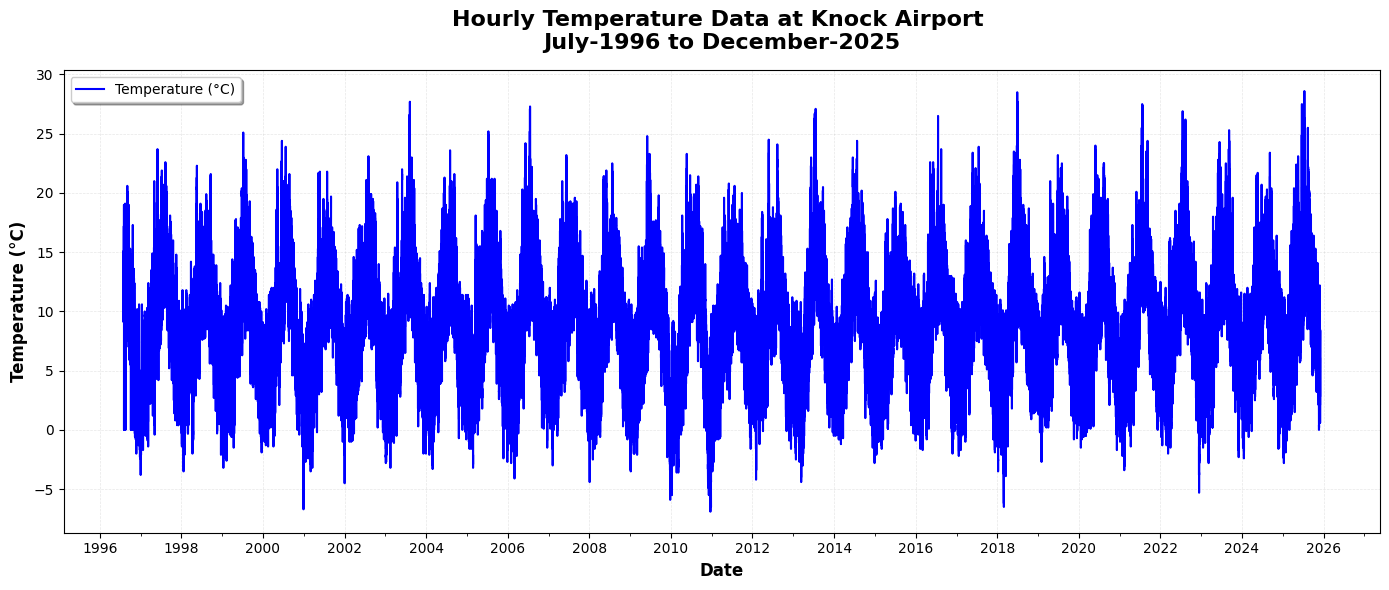

In [14]:
# ploting the temperature data
plt.figure(figsize=(14,6))
plt.plot(temp_weather_data['date'], temp_weather_data['temp'], 
         color='blue', label='Temperature (°C)', linewidth=1.5)
plt.title(f"Hourly Temperature Data at Knock Airport \n" 
          f"{temp_weather_data['date'].min().strftime('%B-%Y')} to "
          f"{temp_weather_data['date'].max().strftime('%B-%Y')}", 
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')

# formating x-axis for better readability 
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Just year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year

plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(figures_dir+'hourly-temperature-plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

### Second Plot of the Temperature - The Mean tempeature each day

In [15]:
# calculating the mean temperature each day

# --- Original Code --- but found out about resample method which is better
'''
# extracting date only removing time component to enabe grouping by date
temp_weather_data['date_only'] = temp_weather_data['date'].dt.date 

# grouping by date only and calculating mean temperature
daily_mean_temp = temp_weather_data.groupby('date_only')['temp'].mean().reset_index() 

# converting date_only back to datetime type
daily_mean_temp['date_only'] = pd.to_datetime(daily_mean_temp['date_only'])

daily_mean_temp.head()
'''
# calculating the mean temperature for each day using resample method 
# see documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
daily_mean_temp = temp_weather_data.resample('D', on='date')['temp'].mean().reset_index()
daily_mean_temp.head()

,date,temp
0,1996-07-31 00:00:00+00:00,12.650000
1,1996-08-01 00:00:00+00:00,11.666667
2,1996-08-02 00:00:00+00:00,12.504167
3,1996-08-03 00:00:00+00:00,14.266667
4,1996-08-04 00:00:00+00:00,13.987500


In [16]:
daily_mean_temp.dtypes

date    datetime64[ns, UTC]
temp                float64
dtype: object

In [17]:
# saving the daily mean temperature data to csv
daily_mean_temp.to_csv(processed_data_dir+"daily-mean-temperature-weather-data.csv", index=False)

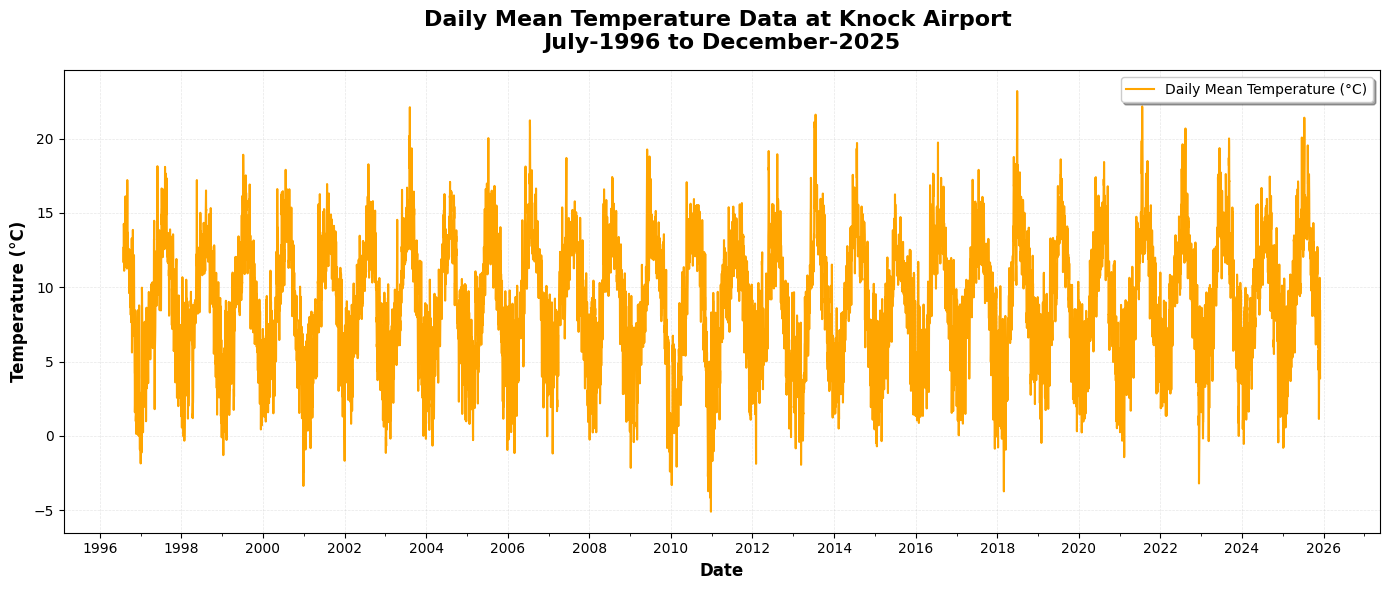

In [18]:
# Ploting the daily mean temperature data
plt.figure(figsize=(14,6))
plt.plot(daily_mean_temp['date'], daily_mean_temp['temp'], 
         color='orange', label='Daily Mean Temperature (°C)', linewidth=1.5)
plt.title(f"Daily Mean Temperature Data at Knock Airport \n" 
          f"{daily_mean_temp['date'].min().strftime('%B-%Y')} to "
          f"{daily_mean_temp['date'].max().strftime('%B-%Y')}", 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')

# formating x-axis for better readability 
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Just year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year


plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(figures_dir+'daily-mean-temperature-plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()


### Third Plot of the Temperature - The Mean tempeature for each Month

In [19]:
# calculating the mean temperature for each month
monthly_mean_temp = temp_weather_data.resample('ME', on='date')['temp'].mean().reset_index()
monthly_mean_temp.head()

,date,temp
0,1996-07-31 00:00:00+00:00,12.650000
1,1996-08-31 00:00:00+00:00,12.946909
2,1996-09-30 00:00:00+00:00,12.174306
3,1996-10-31 00:00:00+00:00,9.614113
4,1996-11-30 00:00:00+00:00,4.909444


In [20]:
# checking data types
monthly_mean_temp.dtypes

date    datetime64[ns, UTC]
temp                float64
dtype: object

In [21]:
# save to csv
monthly_mean_temp.to_csv(processed_data_dir+"monthly-mean-temperature-weather-data.csv", index=False)

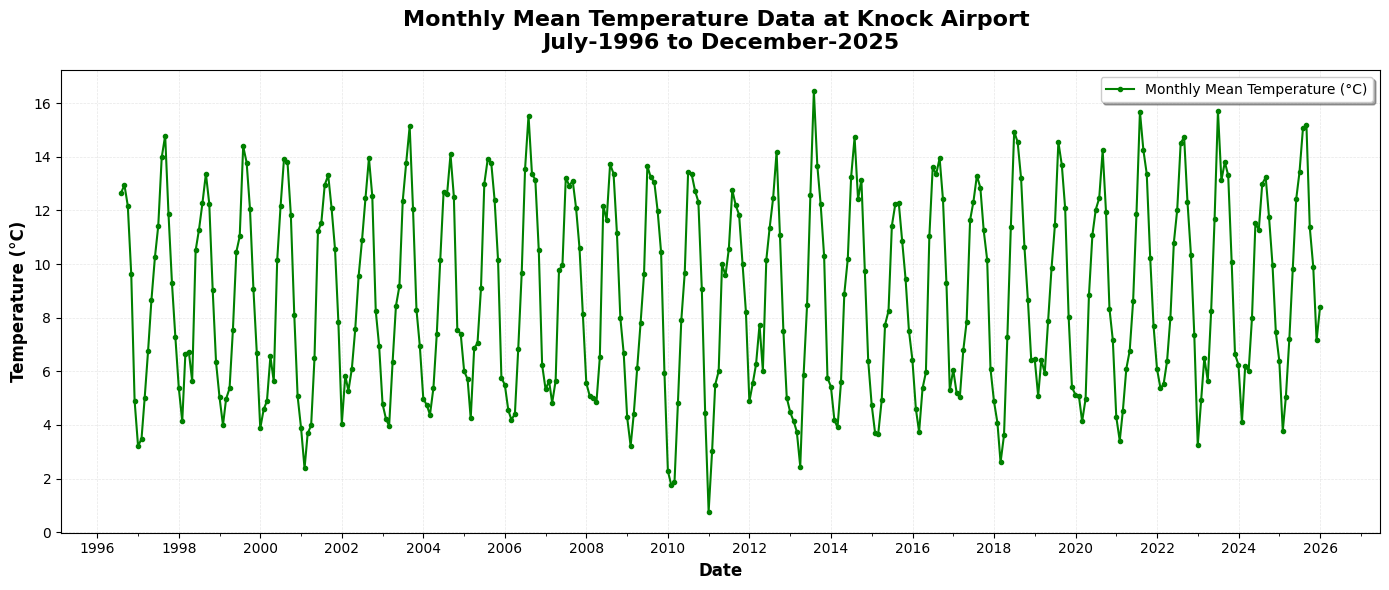

In [22]:
# Ploting the monthly mean temperature data
plt.figure(figsize=(14,6))
plt.plot(monthly_mean_temp['date'], monthly_mean_temp['temp'], 
         color='green', label='Monthly Mean Temperature (°C)', linewidth=1.5,
         marker='o', markersize=3)
plt.title(f"Monthly Mean Temperature Data at Knock Airport \n" 
          f"{monthly_mean_temp['date'].min().strftime('%B-%Y')} to "
          f"{monthly_mean_temp['date'].max().strftime('%B-%Y')}", 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')

# formating x-axis for better readability 
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Just year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year


plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(figures_dir+'monthly-mean-temperature-plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()


## Part 2 - Windspeed Plots

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

In [23]:
# Dropping unnecessary columns from the dataframe

drop_headers_list_wdsp = [
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

# dropping the columns
wdsp_weather_data = cleaned_weather_data.drop(columns=drop_headers_list_wdsp).copy()

In [24]:
# checking the data
wdsp_weather_data.head()

,date,wdsp
0,1996-07-31 08:00:00+00:00,0
1,1996-07-31 09:00:00+00:00,0
2,1996-07-31 10:00:00+00:00,0
3,1996-07-31 11:00:00+00:00,0
4,1996-07-31 12:00:00+00:00,0


In [25]:
wdsp_weather_data.dtypes

date    datetime64[ns, UTC]
wdsp                 object
dtype: object

In [26]:
# In the brief it mentioned there is missing data in the Windspeed so let's check the unique values in the wdsp column
print(wdsp_weather_data['wdsp'].unique())

['0' '6' '8' '9' '7' '11' '13' '12' '14' '10' ' ' '4' '5' '3' '2' '15'
 '16' '17' '18' '19' '1' '20' '23' '21' '22' '24' '25' '28' '26' '29' '31'
 '32' '35' '33' '27' '30' '39' '37' '36' '38' '34' '42' '49' '50' '48'
 '43' '40' '44' '46' '47']


#### Missing Values

As shown above there are some Wind Speed Values that are ' ' missing. Now we need to understand how many in what context and how to handle them. 

But also there are Data Type issues with some of the values have ' ' around them and other not so we need to fix this issue also.

#### First Fix the Data Type 

In [27]:
# Check current data type
print(f"Current dtype: {wdsp_weather_data['wdsp'].dtype}")

# Convert to numeric, forcing errors to NaN
wdsp_weather_data['wdsp'] = pd.to_numeric(wdsp_weather_data['wdsp'], errors='coerce')

# Now check for missing data properly
print(f"\nAfter conversion:")
print(f"Data type: {wdsp_weather_data['wdsp'].dtype}")
print(f"Total rows: {len(wdsp_weather_data)}")
print(f"Missing values (NaN): {wdsp_weather_data['wdsp'].isna().sum()}")
print(f"Zero values (calm): {(wdsp_weather_data['wdsp'] == 0).sum()}")
print(f"Percentage missing: {wdsp_weather_data['wdsp'].isna().sum() / len(wdsp_weather_data) * 100:.2f}%")

Current dtype: object

After conversion:
Data type: float64
Total rows: 257153
Missing values (NaN): 50
Zero values (calm): 410
Percentage missing: 0.02%


In [28]:
wdsp_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257153 entries, 0 to 257152
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    257153 non-null  datetime64[ns, UTC]
 1   wdsp    257103 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 3.9 MB


In [29]:
wdsp_weather_data['wdsp'].unique()

array([ 0.,  6.,  8.,  9.,  7., 11., 13., 12., 14., 10., nan,  4.,  5.,
        3.,  2., 15., 16., 17., 18., 19.,  1., 20., 23., 21., 22., 24.,
       25., 28., 26., 29., 31., 32., 35., 33., 27., 30., 39., 37., 36.,
       38., 34., 42., 49., 50., 48., 43., 40., 44., 46., 47.])

#### How to handle the missing Values

There are 50 'NaN' Values no for the Wind Speed and we need to decide what we want to do with them we have a number of options.

1. **Leave as NaN:** The Plot will have a gap in them where the NaN is. This is good as it isn't creating any artifical data (which is the best for integrity).
2. **Forward Fill:** This is when the value before the blank is copied into the NaN value. This is good as it leaves no gaps, it is a fair assumption to state the wind doesn't change instantly. However, this is creating artifical data so not the best on a purely integrity bases.
3. **Linear Interpolation:** This is when the mnissing value is filled based upon the surronding data using the `interpolate()` function. Again creating artifical data.
4. **Drop Missing Rows:** Simply remove the rows that have missing values which keeps it to only real data like option 1 but like option 1 it will results in gaps in the data. 

#### In this Notebook I will do option 2 **Forward Fill** but the other options are all valid in this and other similar scenarios.

In [30]:
# Forward Fill the missing values for wind speed in a new column 
# see ffill() documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html
wdsp_weather_data['wdsp_ffill'] = wdsp_weather_data['wdsp'].ffill()

In [31]:
# Verify no missing values remain
print(f"Original Missing: {wdsp_weather_data['wdsp'].isna().sum()}")
print(f"Forward Filled Missing: {wdsp_weather_data['wdsp_ffill'].isna().sum()}")

Original Missing: 50
Forward Filled Missing: 0


In [32]:
# save cleanned windspeed data to a csv
wdsp_weather_data.to_csv(processed_data_dir+"cleaned-wdsp-weather-data.csv", index=False)

### First Plot of the Wind Speed - Hourly Wind Speed 

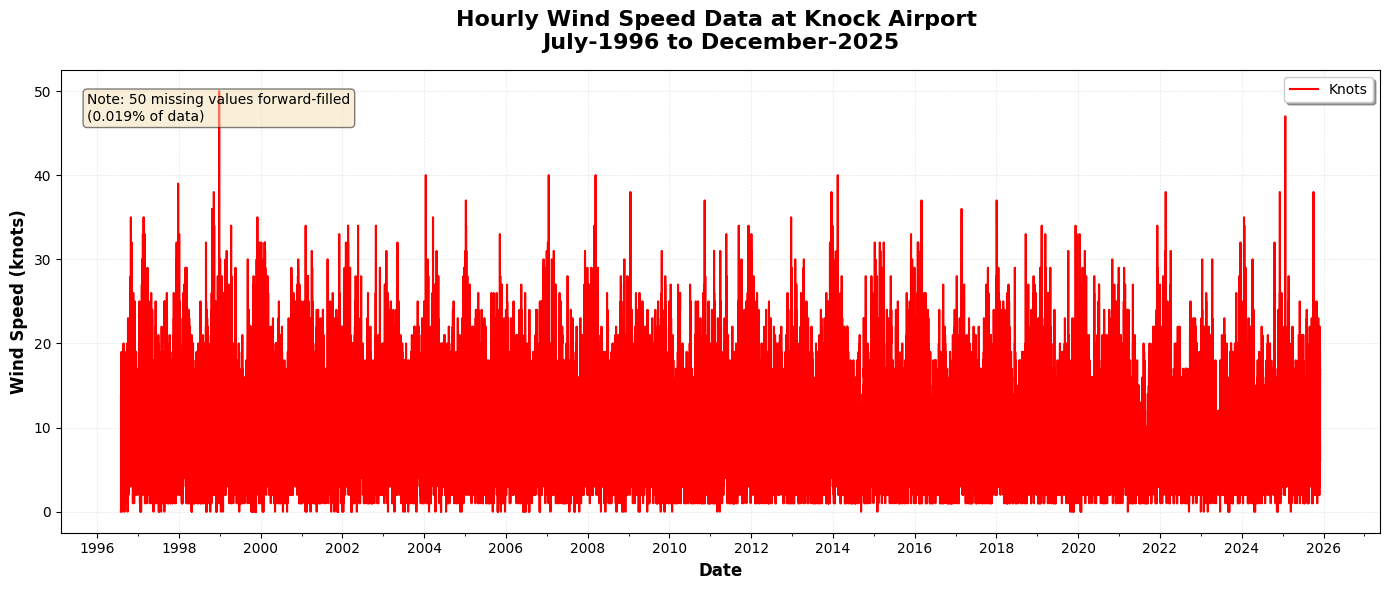

In [33]:
# calculating the missing values to add to the graph 
missing_count = wdsp_weather_data['wdsp'].isna().sum()


# ploting the Wind Speed data
plt.figure(figsize=(14,6))
plt.plot(wdsp_weather_data['date'], wdsp_weather_data['wdsp_ffill'], 
         color='Red', label='Knots', linewidth=1.5)
plt.title(f"Hourly Wind Speed Data at Knock Airport \n" 
          f"{wdsp_weather_data['date'].min().strftime('%B-%Y')} to "
          f"{wdsp_weather_data['date'].max().strftime('%B-%Y')}", 
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')

# formating x-axis for better readability 
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Just year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year


# adding note to the plot about missing values
missing_text = f'Note: {missing_count} missing values forward-filled\n({missing_count/len(wdsp_weather_data)*100:.3f}% of data)'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.95, missing_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(figures_dir+'hourly-wdsp-plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

### Second Plot of the Wind Speed - Rolling Wind Speed (over 24 hours) 

In [34]:
# Calculate 24-hour rolling average windspeed
# using rolling() method - see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
rolling_24h_wdsp = wdsp_weather_data.set_index('date')['wdsp_ffill'].rolling(window=24, min_periods=1).mean().reset_index()
rolling_24h_wdsp.columns = ['date', 'rolling_24h_wdsp']

rolling_24h_wdsp.head()

,date,rolling_24h_wdsp
0,1996-07-31 08:00:00+00:00,0.0
1,1996-07-31 09:00:00+00:00,0.0
2,1996-07-31 10:00:00+00:00,0.0
3,1996-07-31 11:00:00+00:00,0.0
4,1996-07-31 12:00:00+00:00,0.0


In [35]:
# Save to CSV
rolling_24h_wdsp.to_csv(processed_data_dir+"rolling-24h-windspeed-weather-data.csv", index=False)

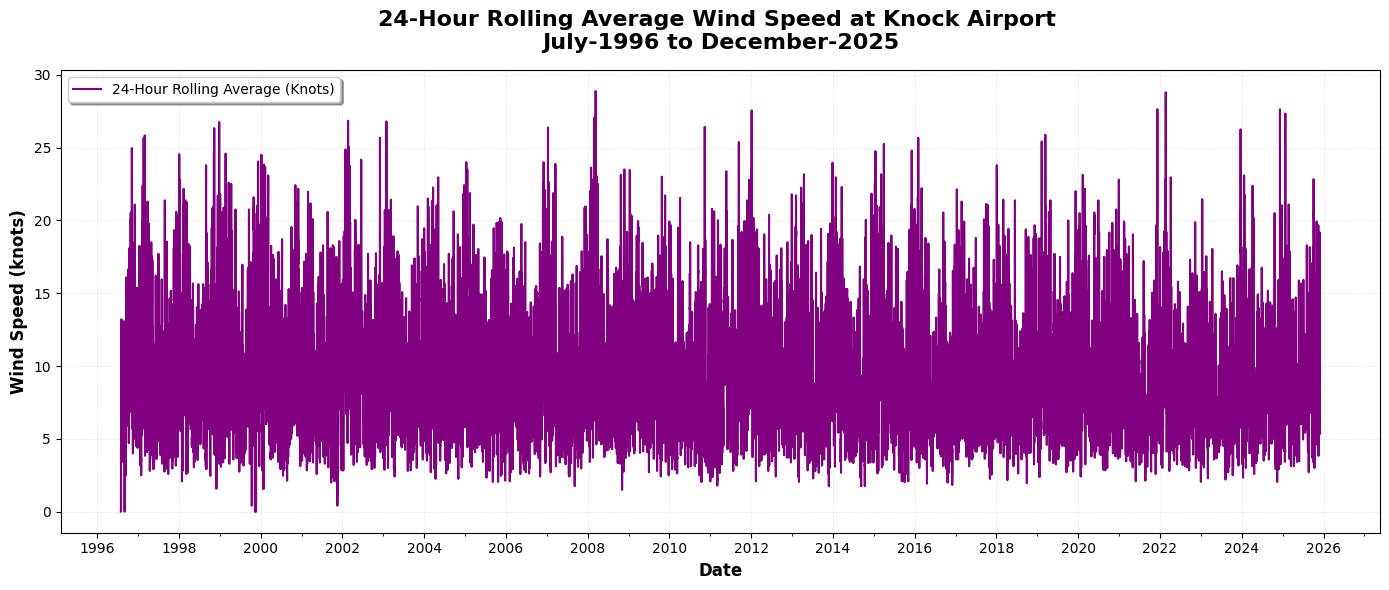

In [36]:
# Plot the 24-hour rolling windspeed
plt.figure(figsize=(14,6))
plt.plot(rolling_24h_wdsp['date'], rolling_24h_wdsp['rolling_24h_wdsp'], 
         color='purple', label='24-Hour Rolling Average (Knots)', linewidth=1.5)
plt.title(f"24-Hour Rolling Average Wind Speed at Knock Airport \n" 
          f"{rolling_24h_wdsp['date'].min().strftime("%B-%Y")} to "
          f"{rolling_24h_wdsp['date'].max().strftime("%B-%Y")}", 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(figures_dir+'rolling-24h-windspeed-plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

### Third Plot of the Wind Speed - Max Windspeed each day

In [37]:
# Calculate daily maximum windspeed
daily_max_wdsp = wdsp_weather_data.resample('D', on='date')['wdsp_ffill'].max().reset_index()
daily_max_wdsp.columns = ['date', 'max_wdsp']

daily_max_wdsp.head()

,date,max_wdsp
0,1996-07-31 00:00:00+00:00,0.0
1,1996-08-01 00:00:00+00:00,14.0
2,1996-08-02 00:00:00+00:00,13.0
3,1996-08-03 00:00:00+00:00,10.0
4,1996-08-04 00:00:00+00:00,18.0


In [38]:
# Save to CSV
daily_max_wdsp.to_csv(processed_data_dir+"daily-max-windspeed-weather-data.csv", index=False)

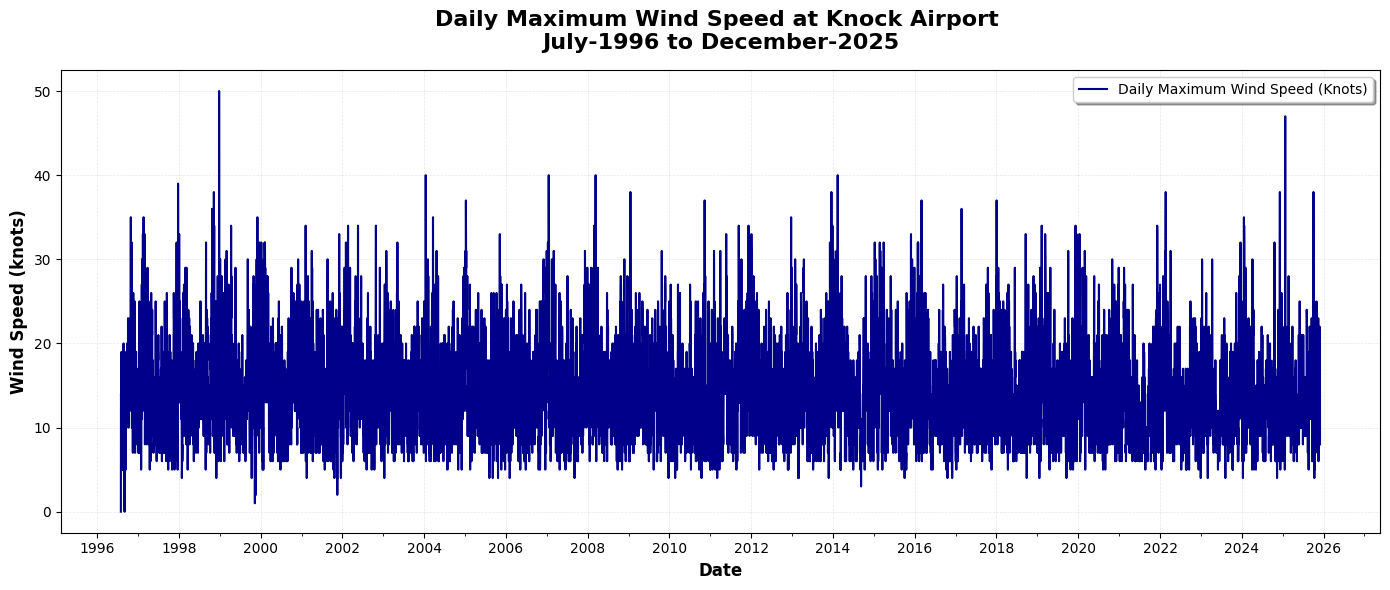

In [39]:
# Plot daily maximum windspeed
plt.figure(figsize=(14,6))
plt.plot(daily_max_wdsp['date'], daily_max_wdsp['max_wdsp'], 
         color='darkblue', label='Daily Maximum Wind Speed (Knots)', linewidth=1.5)
plt.title(f"Daily Maximum Wind Speed at Knock Airport \n" 
          f"{daily_max_wdsp['date'].min().strftime("%B-%Y")} to "
          f"{daily_max_wdsp['date'].max().strftime("%B-%Y")}", 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(figures_dir+'daily-max-windspeed-plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

### Fourth Plot of the Wind Speed - Monthly Mean of the Daily Max Windspeed

In [40]:
# Calculate monthly mean of the daily maximum windspeeds
# Step 1: We already have daily_max_wdsp from above
# Step 2: Resample the daily maximums to get monthly mean
monthly_mean_daily_max_wdsp = daily_max_wdsp.resample('ME', on='date')['max_wdsp'].mean().reset_index()
monthly_mean_daily_max_wdsp.columns = ['date', 'monthly_mean_daily_max']

monthly_mean_daily_max_wdsp.head()

,date,monthly_mean_daily_max
0,1996-07-31 00:00:00+00:00,0.000000
1,1996-08-31 00:00:00+00:00,12.516129
2,1996-09-30 00:00:00+00:00,12.266667
3,1996-10-31 00:00:00+00:00,18.193548
4,1996-11-30 00:00:00+00:00,17.133333


In [41]:
# Save to CSV
monthly_mean_daily_max_wdsp.to_csv(processed_data_dir+"monthly-mean-daily-max-windspeed-weather-data.csv", index=False)

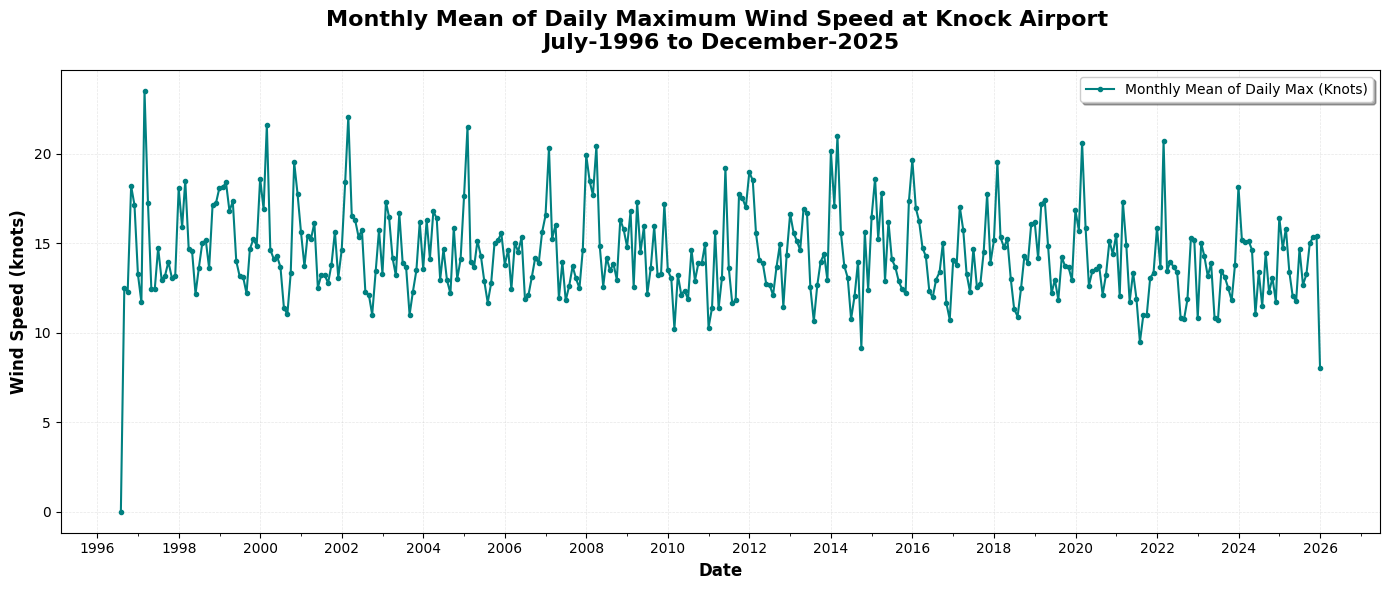

In [42]:
# Plot monthly mean of daily max windspeeds
plt.figure(figsize=(14,6))
plt.plot(monthly_mean_daily_max_wdsp['date'], monthly_mean_daily_max_wdsp['monthly_mean_daily_max'], 
         color='teal', label='Monthly Mean of Daily Max (Knots)', linewidth=1.5,
         marker='o', markersize=3)
plt.title(f"Monthly Mean of Daily Maximum Wind Speed at Knock Airport \n" 
          f"{monthly_mean_daily_max_wdsp['date'].min().strftime("%B-%Y")} to "
          f"{monthly_mean_daily_max_wdsp['date'].max().strftime("%B-%Y")}", 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

plt.legend(loc='best', frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(figures_dir+'monthly-mean-daily-max-windspeed-plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# End